<a href="https://colab.research.google.com/github/deep-pooja/Dynamic_Graph_Clustering/blob/main/dynamic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Different quality indices Implementation**

## Section 1: Dunn Index
The Dunn index aims to identify dense and well-separated clusters. It is defined as the ratio between the minimal inter-cluster distance to maximal intra-cluster distance. Since internal criterion seek clusters with high intra-cluster similarity and low inter-cluster similarity, algorithms that produce clusters with **high Dunn index** are more desirable.

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

Faster Computation  of Dunn Index

In [ ]:
def delta_fast(ck, cl, distances):
    values = distances[np.where(ck)][:, np.where(cl)]
    values = values[np.nonzero(values)]

    return np.min(values)
def big_delta_fast(ci, distances):
    values = distances[np.where(ci)][:, np.where(ci)]
    #values = values[np.nonzero(values)]

    return np.max(values)
def dunn_fast(points, labels):
    """ Dunn index - FAST (using sklearn pairwise euclidean_distance function)

    Parameters
    ----------
    points : np.array
        np.array([N, p]) of all points
    labels: np.array
        np.array([N]) labels of all points
    """
    distances = euclidean_distances(points)
    ks = np.sort(np.unique(labels))

    deltas = np.ones([len(ks), len(ks)])*1000000
    big_deltas = np.zeros([len(ks), 1])

    l_range = list(range(0, len(ks)))

    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta_fast((labels == ks[k]), (labels == ks[l]), distances)

        big_deltas[k] = big_delta_fast((labels == ks[k]), distances)

    di = np.min(deltas)/np.max(big_deltas)

    return di


## Section 2: Davis-Bouldin index
 Since algorithms that produce clusters with low intra-cluster distances (high intra-cluster similarity) and high inter-cluster distances (low inter-cluster similarity) will have a **low Davies–Bouldin index**, the clustering algorithm that produces a collection of clusters with the smallest Davies–Bouldin index is considered the best algorithm based on this criterion.



In [ ]:
def  big_s(x, center):
    len_x = len(x)
    total = 0

    for i in range(len_x):
        total += np.linalg.norm(x[i]-center)

    return total/len_x
def davisbouldin(k_list, k_centers):
    """ Davis Bouldin Index

    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    k_centers : np.array
        The array of the cluster centers (prototypes) of type np.array([K, p])
    """
    len_k_list = len(k_list)
    big_ss = np.zeros([len_k_list], dtype=np.float64)
    d_eucs = np.zeros([len_k_list, len_k_list], dtype=np.float64)
    db = 0

    for k in range(len_k_list):
        big_ss[k] = big_s(k_list[k], k_centers[k])

    for k in range(len_k_list):
        for l in range(0, len_k_list):
            d_eucs[k, l] = np.linalg.norm(k_centers[k]-k_centers[l])

    for k in range(len_k_list):
        values = np.zeros([len_k_list-1], dtype=np.float64)
        for l in range(0, k):
            values[l] = (big_ss[k] + big_ss[l])/d_eucs[k, l]
        for l in range(k+1, len_k_list):
            values[l-1] = (big_ss[k] + big_ss[l])/d_eucs[k, l]

        db += np.max(values)
    res = db/len_k_list
    return res

## silhouette Index

The silhouette coefficient contrasts the average distance to elements in the same cluster with the average distance to elements in other clusters.

Work Well with k-mean clustering

In [ ]:
from sklearn import metrics
#SI = metrics.silhouette_score()

## This section concerns with preprocessing synthetic data generated with DANcer


In [ ]:
# read graphs and communities
file_graph0 = "/content/t0.graph"
file_graph1 = "/content/t1.graph"
file_graph2 = "/content/t2.graph"
file_graph3 = "/content/t3.graph"
file_graph4 = "/content/t4.graph"
file_graph5 = "/content/t5.graph"
file_graph6 = "/content/t6.graph"
file_graph7 = "/content/t7.graph"
file_graph8 = "/content/t8.graph"
file_graph9 = "/content/t9.graph"
file_dynamic_communities = "/content/vertexCommunities"

with open()

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd

G_0 = nx.Graph("/content/t0.graph")

## Section : Dynamic graph data generation

Todal of 1000 nodes
node_num           = 2000

Test with two communities
community_num      = 5

At each iteration migrate 8 nodes from one community to the another
node_change_num    = 16

Length of total time steps the graph will dynamically change
length             = 20

In [ ]:
# function to compute the probability
def P(community_num, inblock_prob=0.1, crossblock_prob=0.01):
    m=np.ones((community_num, community_num)) * 0.01
    for i in range(community_num):
      m[i,i] = 0.1
    return m

In [ ]:
! pip install dynamicgem

In [ ]:
import matplotlib.pyplot as plt
from time import time
import networkx as nx
import pickle
import numpy as np
import os

#import helper libraries
from dynamicgem.utils      import graph_util, plot_util, dataprep_util
from dynamicgem.evaluation import visualize_embedding as viz
from dynamicgem.visualization import plot_dynamic_sbm_embedding
from dynamicgem.evaluation import evaluate_graph_reconstruction as gr
from dynamicgem.graph_generation import dynamic_SBM_graph as sbm

#import the methods
#rom dynamicgem.embedding.ae_static    import AE
#from dynamicgem.embedding.dynamicTriad import dynamicTriad
#from dynamicgem.embedding.TIMERS       import TIMERS
#from dynamicgem.embedding.dynAE        import DynAE
#from dynamicgem.embedding.dynRNN       import DynRNN
#from dynamicgem.embedding.dynAERNN     import DynAERNN


# Parameters for Stochastic block model graph
# Todal of 1000 nodes
node_num           = 2000
# Test with two communities
community_num      = 5
# At each iteration migrate 8 nodes from one community to the another
node_change_num    = 16
# Length of total time steps the graph will dynamically change
length             = 20
# output directory for result
outdir = './output'
intr='./intermediate'
if not os.path.exists(outdir):
    os.mkdir(outdir)
if not os.path.exists(intr):
    os.mkdir(intr)
testDataType = 'sbm_cd'
#Generate the dynamic graph
dynamic_sbm_series = list(sbm.get_community_diminish_series_v2(node_num,
                                                          community_num,
                                                          length,
                                                          1, #comminity ID to perturb
                                                          node_change_num))
graphs     = [g[0] for g in dynamic_sbm_series]
perturbation = [g[2] for g in dynamic_sbm_series]
ground_truth = [g[1] for g in dynamic_sbm_series]
dynamic_chng_nodes = [g[2] for g in dynamic_sbm_series]

In [ ]:
print(len(perturbation))
print(ground_truth)

20
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Section graph embedding using force directed method----> MDS

In [ ]:
!pip install s_gd2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 416 kB 7.6 MB/s 


In [ ]:
import s_gd2

In [ ]:
edge_list = []
for i in range(length):
  edge_list.append(graphs[i].edges)

In [ ]:
coordinates_list = []
for item in edge_list:
  x = [a_tuple[0] for a_tuple in item]
  y = [a_tuple[1] for a_tuple in item]
  coordinates_list.append(s_gd2.layout(x,y))


In [ ]:
len(coordinates_list)

20

## Graph embedding using spectral clustering method

In [ ]:
from sklearn.manifold import SpectralEmbedding
import networkx as nx

embedding = SpectralEmbedding(n_components=2,affinity='precomputed')

spectral_embedding = []
for i in range(length):
  A = nx.adjacency_matrix(graphs[i])
  c = embedding.fit_transform(A)
  spectral_embedding.append(c)

# Coreset Section

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

def dist_to_B(x, B, return_closest_index=False):
    min_dist = np.inf
    closest_index = -1
    for i, b in enumerate(B):
        dist = np.linalg.norm(x - b)
        if dist < min_dist:
            min_dist = dist
            closest_index = i
    if return_closest_index:
        return min_dist, closest_index
    return min_dist
"""
function to get the list of k center from datapoints
"""

def Algorithm1(data_vectors, k):
    "D^2-sampling"
    B = []
    B.append(data_vectors[np.random.choice(len(data_vectors))])

    for _ in range(k - 1):
        p = np.zeros(len(data_vectors))
        for i, x in enumerate(data_vectors):
            p[i] = dist_to_B(x, B) ** 2
        p = p / sum(p)
        B.append(data_vectors[np.random.choice(len(data_vectors), p=p)])

    return B

In [ ]:
# static coreset algorithm implementation
def BFL16(P, B, m):
    """Algorithm 2 in https://arxiv.org/pdf/1612.00889.pdf [BFL16].
    Per Table 1, the coreset size is O(k^2 logk / eps^3) or O(dk logk / eps^2)
    Note that D(p, q) appears to be the squared distance dist(p, q) ** 2 (top of pg 23)
    We're using the best of N k-means++ initializations for the (alpha, beta) approximation.
    P is the list of points, B is a list of k-means++ cluster center initializations.
    """

    num_points_in_clusters = {i: 0 for i in range(len(B))}
    sum_distance_to_closest_cluster = 0
    for p in P:
        min_dist, closest_index = dist_to_B(p, B, return_closest_index=True)
        num_points_in_clusters[closest_index] += 1
        sum_distance_to_closest_cluster += min_dist ** 2

    Prob = np.zeros(len(P))
    for i, p in enumerate(P):
        min_dist, closest_index = dist_to_B(p, B, return_closest_index=True)
        Prob[i] += min_dist ** 2 / (2 * sum_distance_to_closest_cluster)
        Prob[i] += 1 / (2 * len(B) * num_points_in_clusters[closest_index])

    assert 0.999 <= sum(Prob) <= 1.001, 'sum(Prob) = %s; the algorithm should automatically '\
            'normalize Prob by construction' % sum(Prob)
    chosen_indices = np.random.choice(len(P), size=m, p=Prob)
    weights = [1 / (m * Prob[i]) for i in chosen_indices]

    return [P[i] for i in chosen_indices]

In [ ]:
coreset_list_f = []
coreset_list_s = []
sample_size = 200
for i in range(length):
  B_f = Algorithm1(coordinates_list[i],community_num)
  B_s = Algorithm1(spectral_embedding[i],community_num)
  coreset_list_f.append(BFL16(coordinates_list[i],B_f,sample_size))
  coreset_list_s.append(BFL16(spectral_embedding[i],B_s,sample_size))

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

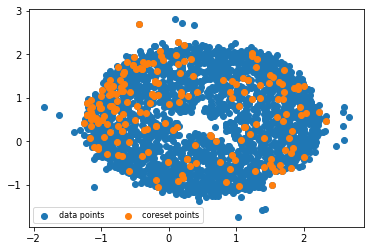

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

core_x = [item[0] for item in coreset_list_f[1]]

core_y = [item[1] for item in coreset_list_f[1]]

data_x = [item[0] for item in coordinates_list[1]]
data_y = [item[1] for item in coordinates_list[1]]

%matplotlib inline
d = plt.scatter(data_x, data_y)
c = plt.scatter(core_x, core_y)
plt.legend((d,c),
           ('data points', 'coreset points'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.show()

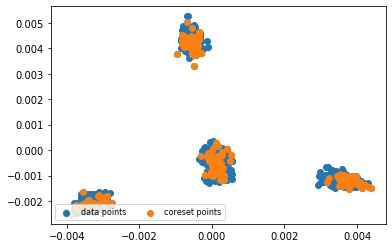

In [ ]:
core_x = [item[0] for item in coreset_list_s[1]]

core_y = [item[1] for item in coreset_list_s[1]]

data_x = [item[0] for item in spectral_embedding[1]]
data_y = [item[1] for item in spectral_embedding[1]]

%matplotlib inline
d = plt.scatter(data_x, data_y)
c = plt.scatter(core_x, core_y)
plt.legend((d,c),
           ('data points', 'coreset points'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
def get_cost(data_vectors, center_points):
    cost = 0
    for x in data_vectors:
        for c in center_points:
          d1=(x[0]-c[0])**2
          d2=(x[1]-c[1])**2
          d=np.sqrt(d1+d2)
          cost += d
    return cost

## computing clustering using k-mean, Please define a function to do so....done repeat codes

In [ ]:
kmeans_plain_f = []
cost_plain_f = []
#Predictions_Plain = []
for i in range(length):
  kmeans_plain_f.append(KMeans(n_clusters=community_num).fit(coordinates_list[i]))
  #Predictions_Plain.append(kmeans_plain[i].predict(coordinates_list[i]))
  cost_plain_f.append(get_cost(coordinates_list[i],kmeans_plain_f[i].cluster_centers_))

NameError: ignored

In [ ]:
kmeans_plain_s = []
cost_plain_s = []
#Predictions_Plain = []
for i in range(length):
  kmeans_plain_s.append(KMeans(n_clusters=community_num).fit(spectral_embedding[i]))
  #Predictions_Plain.append(kmeans_plain[i].predict(coordinates_list[i]))
  cost_plain_s.append(get_cost(spectral_embedding[i],kmeans_plain_s[i].cluster_centers_))

## computing clustering on coreset....

In [ ]:
kmeans_coreset_s = []
cost_coreset_s = []
#Predictions_coreset = []
for i in range(length):
  kmeans_coreset_s.append(KMeans(n_clusters=community_num).fit(coreset_list_s[i]))
  #Predictions_coreset.append(kmeans_coreset[i].predict(coreset_list[i]))
  cost_coreset_s.append(get_cost(coreset_list_s[i],kmeans_coreset_s[i].cluster_centers_))

In [ ]:
kmeans_coreset_f = []
cost_coreset_f = []
#Predictions_coreset = []
for i in range(length):
  kmeans_coreset_f.append(KMeans(n_clusters=community_num).fit(coreset_list_f[i]))
  #Predictions_coreset.append(kmeans_coreset[i].predict(coreset_list[i]))
  cost_coreset_f.append(get_cost(coreset_list_f[i],kmeans_coreset_f[i].cluster_centers_))

lets get the coordinates of purturb nodes

Geometric median

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist, euclidean

def l1_median(X, eps=1e-6):
    """
    Computes weighted geometric median
    :param X: the list of sample points, a 2D ndarray
    :param eps: acceptable error margin
    :return: first estimate meeting eps
    """
    y = np.mean(X,0) # the geometric mean is a fare start
    while True:
        while np.any(cdist(X,[y])==0): # Euclidean distances, let's move away to avoid any null
            y +=0.1*np.ones(len(y))
        # set of weights that are the inverse of the distances from current estimate to the observations
        W = 1/cdist(X,[y]) # element-wise
        # new estimate is the weighted average of the observations
        y1 = np.sum(W*X,0)/np.sum(W) # sum along axis 0
        if euclidean(y,y1) < eps:
            return y1
        y = y1

def weighted_l1_median(X, WX, eps=1e-6):
    """
    Computes weighted geometric median
    :param X: the list of sample points, a 2D ndarray
    :param WX: the list of weights
    :param eps: acceptable error margin
    :return: first estimate meeting eps
    """
    y = np.average(X,axis=0,weights=WX)
    while True:
        while np.any(cdist(X,[y])==0):
            y +=0.1*np.ones(len(y))
        W = np.expand_dims(WX,axis=1)/cdist(X,[y]) # element-wise operation
        y1 = np.sum(W*X,0)/np.sum(W)
        if euclidean(y,y1) < eps:
            return y1
        y = y1

In [ ]:
list(graphs[0].neighbors(0))

In [ ]:
approx_coord = []
for i,item in enumerate(perturbation):
  #print(item)
  for j in item:
    #print(j)
    neighbor = list(graphs[i].neighbors(j))
    #print(neighbor)
    approx_coord.append(l1_median([coordinates_list[i][x] for x in neighbor]))
#print(approx_coord)
len(approx_coord)

304

In [ ]:
exact_coord_f = []
for i in range(length):
  if i>0:
    exact_coord_f.append([coordinates_list[i][x] for x in perturbation[i]])

In [ ]:
exact_coord_s = []
for i in range(length):
  if i>0:
    exact_coord_s.append([spectral_embedding[i][x] for x in perturbation[i]])

In [ ]:
af = [approx_coord[i * (node_change_num):(i + 1) * (node_change_num)] for i in range((len(approx_coord) + (node_change_num) - 1) // (node_change_num) )]
print(len(af))

19


In [ ]:
len(kmeans_plain_f)
len(exact_coord_f)

19

In [ ]:
dynamic_f_labels = []
dynamic_s_labels = []
static_f_labels = []
static_s_labels = []
for i,item in enumerate(exact_coord_s):
  static_s_labels.append(kmeans_plain_s[i].predict(item))
for i,item in enumerate(exact_coord_f):
  static_f_labels.append(kmeans_plain_f[i].predict(item))
for i, item in enumerate(af):
  dynamic_f_labels.append(kmeans_plain_f[i].predict(item))
  dynamic_s_labels.append(kmeans_plain_s[i].predict(item))

## Evaluations using Dunn Index

In [ ]:
dunn_index_static_s = []
dunn_index_static_f = []
dunn_index_dynamic_f = []
dunn_index_dynamic_s = []
for i in range(length-1):
  dunn_index_static_s.append(dunn_fast(exact_coord_s[i],static_s_labels[i]))
  dunn_index_static_f.append(dunn_fast(exact_coord_f[i],static_f_labels[i]))
  dunn_index_dynamic_s.append(dunn_fast(af[i],dynamic_s_labels[i]))
  dunn_index_dynamic_f.append(dunn_fast(af[i],dynamic_f_labels[i]))

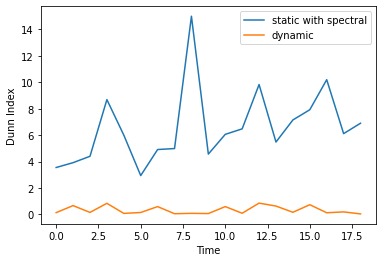

In [ ]:
%matplotlib inline
plt.plot(dunn_index_static_s,label='static with spectral')
plt.plot(dunn_index_dynamic_s,label = 'dynamic')
plt.ylabel("Dunn Index")
plt.xlabel("Time")
plt.legend()

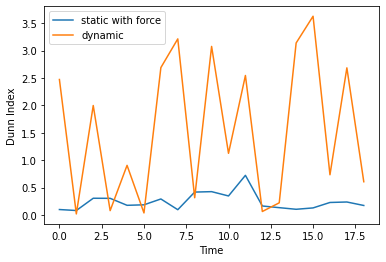

In [ ]:
%matplotlib inline
plt.plot(dunn_index_static_f,label='static with force')
plt.plot(dunn_index_dynamic_f,label = 'dynamic')
plt.ylabel("Dunn Index")
plt.xlabel("Time")
plt.legend()

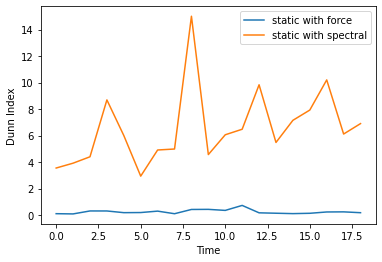

In [ ]:
%matplotlib inline
plt.plot(dunn_index_static_f,label='static with force')
plt.plot(dunn_index_static_s,label = 'static with spectral')
plt.ylabel("Dunn Index")
plt.xlabel("Time")
plt.legend()

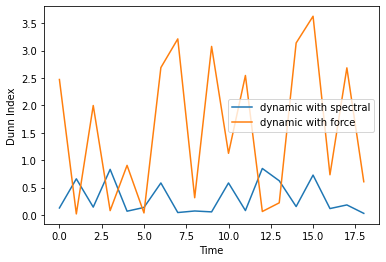

In [ ]:
%matplotlib inline
plt.plot(dunn_index_dynamic_s,label='dynamic with spectral')
plt.plot(dunn_index_dynamic_f,label = 'dynamic with force')
plt.ylabel("Dunn Index")
plt.xlabel("Time")
plt.legend()

## Evalutions using DB Index

In [ ]:
dB_index_static_s = []
dB_index_static_f = []
dB_index_dynamic_f = []
dB_index_dynamic_s = []
for i in range(length-1):
  dB_index_static_s.append(davisbouldin(exact_coord_s[i],static_s_labels[i]))
  dB_index_static_f.append(davisbouldin(exact_coord_f[i],static_f_labels[i]))
  dB_index_dynamic_s.append(davisbouldin(af[i],dynamic_s_labels[i]))
  dB_index_dynamic_f.append(davisbouldin(af[i],dynamic_f_labels[i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars


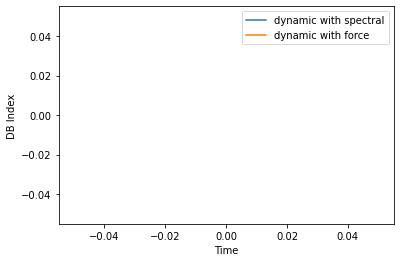

In [ ]:
%matplotlib inline
plt.plot(dB_index_dynamic_s,label='dynamic with spectral')
plt.plot(dB_index_dynamic_f,label = 'dynamic with force')
plt.ylabel("DB Index")
plt.xlabel("Time")
plt.legend()

**Geometric MST Clustering Static ALgorithm implementation**

In [ ]:
from sklearn.manifold import SpectralEmbedding
import networkx as nx

In [ ]:
eucl_edges_s = []
eucl_edges_f = []
for i in range(length):
  eucl_edges_s.append(euclidean_distances(spectral_embedding[i]))
  eucl_edges_f.append(euclidean_distances(coordinates_list[i]))

In [ ]:
print(eucl_edges_s[0])

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt


def minimum_spanning_tree(X, copy_X=True):
    """X are edge weights of fully connected graph"""
    if copy_X:
        X = X.copy()

    if X.shape[0] != X.shape[1]:
        raise ValueError("X needs to be square matrix of edge weights")
    n_vertices = X.shape[0]
    spanning_edges = []

    # initialize with node 0:
    visited_vertices = [0]
    num_visited = 1
    # exclude self connections:
    diag_indices = np.arange(n_vertices)
    X[diag_indices, diag_indices] = np.inf

    while num_visited != n_vertices:
        new_edge = np.argmin(X[visited_vertices], axis=None)
        # 2d encoding of new_edge from flat, get correct indices
        new_edge = divmod(new_edge, n_vertices)
        new_edge = [visited_vertices[new_edge[0]], new_edge[1]]
        # add edge to tree
        spanning_edges.append(new_edge)
        visited_vertices.append(new_edge[1])
        # remove all edges inside current tree
        X[visited_vertices, new_edge[1]] = np.inf
        X[new_edge[1], visited_vertices] = np.inf
        num_visited += 1
    return np.vstack(spanning_edges)

In [ ]:
MST_s = []
MST_f = []
for i in range(length):
  MST_s.append(minimum_spanning_tree(eucl_edges_s[i]))
  MST_f.append(minimum_spanning_tree(eucl_edges_f[i]))

In [ ]:
!pip install mst_clustering

In [ ]:
from mst_clustering import MSTClustering

In [ ]:
model = MSTClustering(cutoff_scale=2)
dynamic_labels = []
s_f_labels = []
s_s_labels = []
for i,item in enumerate(exact_coord_s):
  s_s_labels.append(model.fit_predict(item))
for i,item in enumerate(exact_coord_f):
  s_f_labels.append(model.fit_predict(item))
for i, item in enumerate(af):
  dynamic_labels.append(model.fit_predict(item))

In [ ]:
di_s_s = []
di_s_f = []
di_dynamic = []
for i in range(length-1):
  di_s_s.append(dunn_fast(exact_coord_s[i],s_s_labels[i]))
  di_s_f.append(dunn_fast(exact_coord_f[i],s_f_labels[i]))
  di_dynamic.append(dunn_fast(af[i],dynamic_labels[i]))

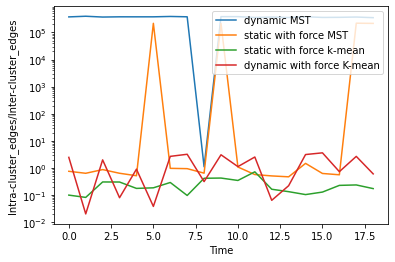

In [ ]:
%matplotlib inline
plt.yscale("log")
#plt.plot(di_s_s, label = 'static with spectral MST')
plt.plot(di_dynamic, label = 'dynamic MST')
plt.plot(di_s_f, label = 'static with force MST')
#plt.plot(dunn_index_dynamic_s,label='dynamic with spectral K-mean')
plt.plot(dunn_index_static_f,label = 'static with force k-mean')
plt.plot(dunn_index_dynamic_f,label='dynamic with force K-mean')
#plt.plot(dunn_index_static_s,label = 'static with spectral k-mean')
plt.ylabel("Intra-cluster_edges/Inter-cluster_edges")
plt.xlabel("Time")
plt.legend(loc = 'upper right')

In [ ]:
# predict the labels with the MST algorithm
model = MSTClustering(cutoff_scale=2)
labels_s = []
labels_f = []

for i in range(length):
  labels.append(model.fit_predict(MST_s[i]))

# plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow');

In [ ]:
#P = np.random.uniform(size=(50, 2))

#X = squareform(pdist(P))
#edge_list = minimum_spanning_tree(X)


%matplotlib inline
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

ax2.scatter(P[:, 0], P[:, 1])

for edge in edge_list:
    i, j = edge
    plt.plot([P[i, 0], P[j, 0]], [P[i, 1], P[j, 1]], c='r')
plt.show()


In [ ]:
for t, item in enumerate(MST_s):
  for edge in item:
    i,j = edge




TypeError: ignored

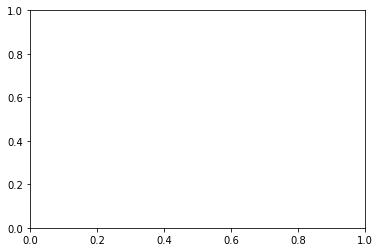

In [ ]:



ax2.scatter(eucl_edges_s[:, 0], eucl_edges_s[0][:, 1])

for edge in MST_s:
  i, j = edge
  ax2.plot([eucl_edges_s[0][i, 0], eucl_edges_s[0][j, 0]], [eucl_edges_s[0][i, 1], eucl_edges_s[0][j, 1]], c='r')
plt.show()


Now to get the clusters we can remove the heaviest edges that if we want k cluster then we only need to remove k-1 heaviest edges.

Dynamic MSt Implementaion using Simple algorithm:

Maintain two data structure as follows:

1. First keeps MST as linking and cutting tree (splay tree)-------->T
2. Second stores all  ecludian edges in priority queue in sorted order, i.e according to their cost---------->Q

Now when new edge 'e' is inserted, update T and Q in log(n) time

When edge is deleted, it is first deleted from Q in log(n) time. if e is not-tree edge--> do nothing, otherwise calls static MST algorithm on the edges in Q.

In [ ]:
# static coreset algorithm
def ALGs(P,k, m):
  B = Algorithm1(P,k)
  coreset = BFL16(P,B,m)
  return coreset

In [ ]:
import math
def buckets(n):
    arr = []
    slot_num =  math.floor(math.log(n,2))  # 10 means 10 slots, each
                                           # slot's size is 0.1
    for i in range(slot_num):
        arr.append([])

Fully dynamic coreset implentation using complete binary tree

In [ ]:
# def BFL16(P, B, m)<- static coreset algorithm, m sampling size, p<- pointset
# def Algorithm1(data_vectors, k) <- to compute B

# function to allocate new node
class newNode:
    def __init__(self, data):
        self.data = data
        self.left = self.right = None

def insertLevelOrder(arr, root, i, n):

    # Base case for recursion
    if i < n:
        temp = newNode(arr[i])
        root = temp

        # insert left child
        root.left = insertLevelOrder(arr, root.left,
                                     2 * i + 1, n)

        # insert right child
        root.right = insertLevelOrder(arr, root.right,
                                      2 * i + 2, n)
    return root